# Introduction

This notebook showcases a predictive maintenance approach applied to a centrifugal pump using synthetic data, designed as a learning project to explore machine learning applications in chemical engineering. The primary objective is to classify the pump's status as either operating normally or at risk of imminent failure by analyzing key operational variables such as vibration, temperature, pressure, flow rate, and operating hours.

To achieve this, three machine learning models—Logistic Regression, Support Vector Machine (SVM), and Random Forest—are compared in terms of their performance metrics, interpretability, and suitability for predictive maintenance tasks. This analysis not only highlights the trade-offs between model complexity and accuracy but also provides insights into their potential applicability in industrial environments.

This project is for educational purposes only and uses synthetic data to simulate operational conditions. The models presented here are intended as examples to deepen my understanding of machine learning for predictive maintenance and chemical engineering applications, rather than as production-ready solutions. 

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Data generation

In [2]:
np.random.seed(42)

# Operational variables
n_samples = 1000
vibration = np.random.normal(3, 0.5, n_samples)
temperature = np.random.normal(70, 5, n_samples)
pressure = np.random.normal(10, 1, n_samples)
flow_rate = np.random.normal(100, 10, n_samples)
operating_hours = np.random.randint(0, 5000, n_samples)


# Failure simulation
status = np.where((vibration > 4.5) | (temperature > 80) | (operating_hours > 4000), 1, 0)

# Dataset
df = pd.DataFrame({
    'Vibration_mm_s': vibration,
    'Temperature_C': temperature,
    'Pressure_bar': pressure,
    'Flow_rate_m3_h': flow_rate,
    'Operating_hours': operating_hours,
    'Pump_status': status
})

In [3]:
df.head()

,Vibration_mm_s,Temperature_C,Pressure_bar,Flow_rate_m3_h,Operating_hours,Pump_status
0,3.248357,76.996777,9.324822,80.921924,919,0
1,2.930868,74.623168,9.855481,91.396150,69,0
2,3.323844,70.298152,9.207580,95.863945,3924,0
3,3.761515,66.765316,9.692038,118.876877,2086,0
4,2.882923,73.491117,8.106385,105.565531,2007,0


# Data visualization

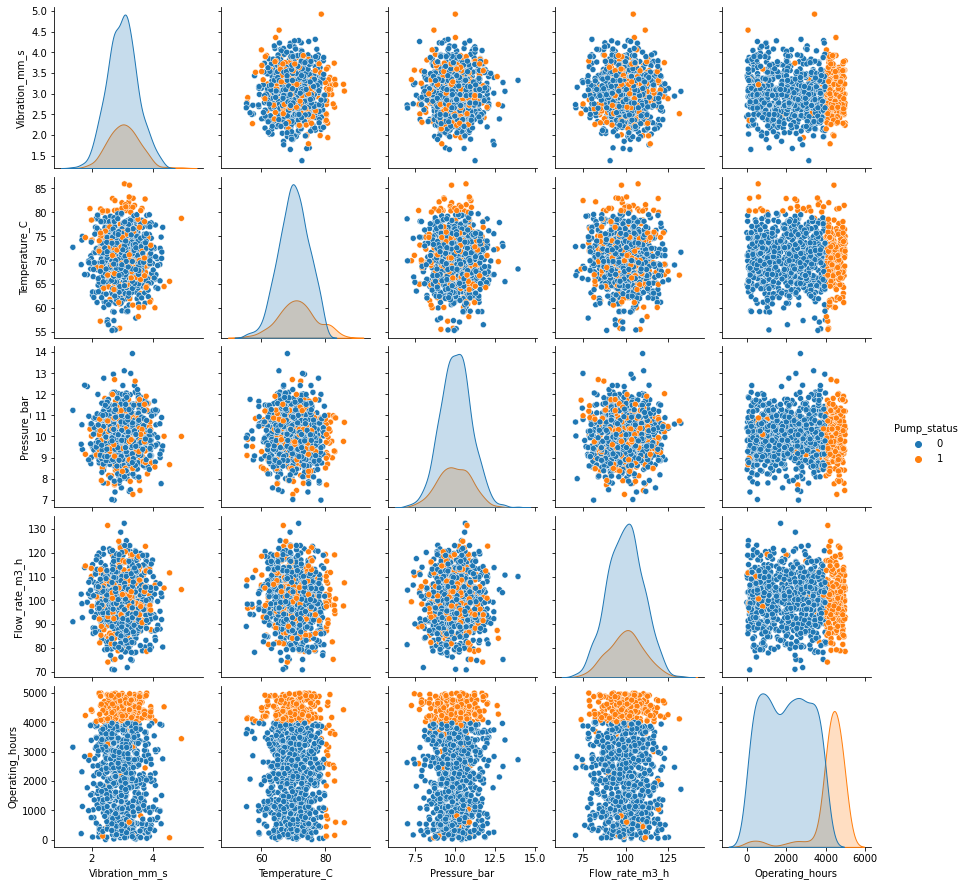

In [4]:
sns.pairplot(df, hue='Pump_status')
plt.show()

# Model

## Preprocessing

In [5]:
X = df.drop('Pump_status', axis=1)
y = df['Pump_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models

## Support Vector Machine (SVM)

In [6]:
# Train SVM on the training set
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [7]:
# Prediction on the training set
y_train_pred_svm = svm_model.predict(X_train)
print("SVM - Training Set")
print(classification_report(y_train, y_train_pred_svm))

SVM - Training Set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       523
           1       0.94      0.88      0.91       177

    accuracy                           0.96       700
   macro avg       0.95      0.93      0.94       700
weighted avg       0.96      0.96      0.96       700



In [8]:
# Prediction on the test (hold-out) set
y_test_pred_svm = svm_model.predict(X_test)
print("SVM - Test Set")
print(classification_report(y_test, y_test_pred_svm))

SVM - Test Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       246
           1       0.96      0.89      0.92        54

    accuracy                           0.97       300
   macro avg       0.97      0.94      0.95       300
weighted avg       0.97      0.97      0.97       300



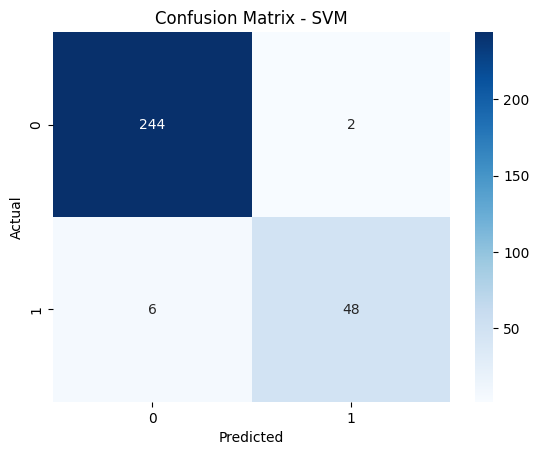

In [9]:
# Plot the confusion matrix for the test set
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Random Forest Classifier

In [11]:
# Train Random Forest on the training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Prediction on the training set
y_train_pred_rf = rf_model.predict(X_train)
print("Random Forest - Training Set")
print(classification_report(y_train, y_train_pred_rf))

Random Forest - Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523
           1       1.00      1.00      1.00       177

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [13]:
# Prediction on the test (hold-out) set
y_test_pred_rf = rf_model.predict(X_test)
print("Random Forest - Test Set")
print(classification_report(y_test, y_test_pred_rf))

Random Forest - Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      0.98      0.99        54

    accuracy                           1.00       300
   macro avg       1.00      0.99      0.99       300
weighted avg       1.00      1.00      1.00       300



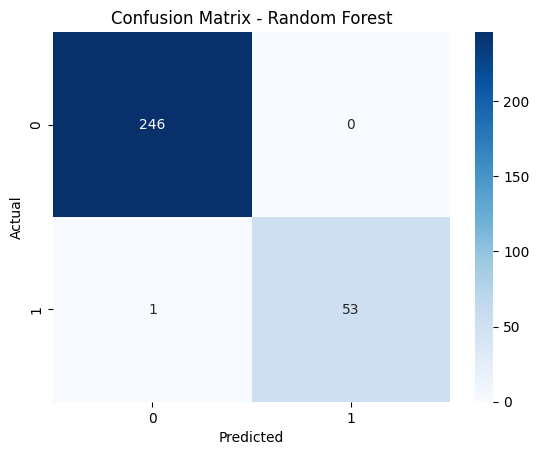

In [14]:
# Plot the confusion matrix for the test set
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Logistic Regression

In [16]:
# Train Logistic Regression on the training set
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
# Prediction on the training set
y_train_pred_lr = lr_model.predict(X_train)
print("Logistic Regression - Training Set")
print(classification_report(y_train, y_train_pred_lr))

Logistic Regression - Training Set
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       523
           1       0.86      0.82      0.84       177

    accuracy                           0.92       700
   macro avg       0.90      0.89      0.89       700
weighted avg       0.92      0.92      0.92       700



In [18]:
# Prediction on the test (hold-out) set
y_test_pred_lr = lr_model.predict(X_test)
print("Logistic Regression - Test Set")
print(classification_report(y_test, y_test_pred_lr))

Logistic Regression - Test Set
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       246
           1       0.86      0.81      0.84        54

    accuracy                           0.94       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.94      0.94      0.94       300



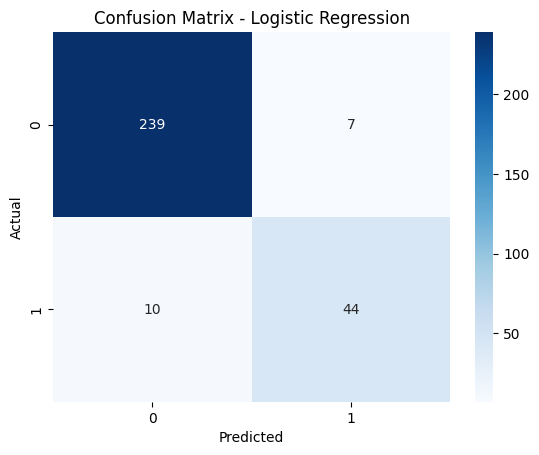

In [19]:
# Plot the confusion matrix for the test set
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Conclusion

This notebook is part of my learning journey in predictive maintenance using machine learning within the context of chemical engineering applications. The objective is to enhance my knowledge in ML techniques and demonstrate their potential for industrial applications.

Random Forest demonstrated the best overall performance, with nearly perfect metrics, particularly in detecting failures (Class 1). It is the most suitable model for maximizing prediction accuracy, although it comes with a higher risk of overfitting and reduced interpretability.

SVM provided a well-balanced performance between precision, recall, and F1-score, making it a strong alternative where moderate complexity and robustness are acceptable.

Logistic Regression was the simplest and most interpretable model but showed lower recall and F1-score for Class 1, making it less effective in detecting failures. However, its simplicity and computational efficiency make it a valuable starting point for predictive maintenance models.

This project reflects the practical application of ML models in chemical engineering, highlighting the trade-offs between complexity, accuracy, and interpretability, essential considerations in industrial environments and academic research.